# Do Wars in the USA Influence the Quality of Art ? 💣⚔️ 🎥🎵
## Final Project in Data Analysis with Python 
### *by* Neil Reuveni & Daniel Millet

In this project we're going to check if there's a connection between wars in the USA to the quality of art.
For that purpose, we're going to use data of more than 19,000 songs from spotify, more than 81,000 movies, 2 wikipedia tables and a lot of good vibes and enthusiasm. Let's start!

![GIFUrl](https://media1.tenor.com/images/0ba6af46a26a05c1e814f19d3dd5844d/tenor.gif?itemid=13024060)

First, we're going to download and import all nessecary packs.

In [1]:
#Install packages documentation:
#!pip install lyricsgenius
#!pip install nltk
#!pip install textblob
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')
#nltk.download('stopwords')
#!pip install wikitables
%matplotlib inline

In [2]:
#Import relevant packages, including genius API, NLP analysis and Wikipedia API
import pandas as pd
import matplotlib.pyplot as plt
import lyricsgenius
import requests
import nltk
from textblob import TextBlob
from wikitables import import_tables

## Let's start with the music score

Then we're going to import the data of spotify songs, clean it, and use just what's over 80 in popularity. 

After that, we'll calculate the sentiment of each song lyrics using NLP (with TextBlob).

We'll create a dictionary of the most frequent values in each analysis category, and use a function that gives songs 
one point for each category that meets the critira.

We'll apply this function on different data sets from each musical decade, so that each song can get a score from 0 

(not meeting any critiras) to 14 (meeting all critiras).
Then we have the mean musical score of each decade.

![gif2](https://media1.tenor.com/images/8a05fd7e140f81c8a04a55b498fb1dad/tenor.gif?itemid=5225885)

In [3]:
#Create DataFrames
songs_df = pd.read_csv("song_data.csv")
info_df = pd.read_csv("song_info.csv")
#Check if there are NA values
songs_df.isna().sum()
info_df.isna().sum()
#Get data info
songs_df.info()
info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_popularity   18835 non-null  int64  
 2   song_duration_ms  18835 non-null  int64  
 3   acousticness      18835 non-null  float64
 4   danceability      18835 non-null  float64
 5   energy            18835 non-null  float64
 6   instrumentalness  18835 non-null  float64
 7   key               18835 non-null  int64  
 8   liveness          18835 non-null  float64
 9   loudness          18835 non-null  float64
 10  audio_mode        18835 non-null  int64  
 11  speechiness       18835 non-null  float64
 12  tempo             18835 non-null  float64
 13  time_signature    18835 non-null  int64  
 14  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 2.2+ MB
<class 'pandas.core.frame.Data

In [4]:
#Convert song duration from miliseconds to minutes
songs_df["song_duration_ms"] = songs_df["song_duration_ms"] / 60000
songs_df.rename(columns={"song_duration_ms":"song_duration"}, inplace=True)

In [5]:
#Drop duplicate songs from both data sets
songs_df.drop_duplicates(subset="song_name", ignore_index=True, inplace=True)
info_df.drop_duplicates(subset="song_name", ignore_index=True, inplace=True)

In [6]:
#Create a DataFrame that includes the artists names.
artist_name = info_df["artist_name"]
song_and_artist = pd.concat([songs_df,artist_name],ignore_index = False,sort=False,axis = 1)

In [7]:
#Use loc to get most popular songs (over 80 in popularity), then reset indexes
pop_songs = song_and_artist.loc[song_and_artist["song_popularity"] > 80]
pop_songs.reset_index(inplace=True)
pop_songs = pd.DataFrame(pop_songs)
pop_songs

,index,song_name,song_popularity,song_duration,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,artist_name
0,6,Last Resort,81,3.331550,0.000504,0.581,0.887,0.001110,4,0.2680,-3.659,0,0.0624,90.578,4,0.724,Papa Roach
1,9,Sex on Fire,81,3.389100,0.001720,0.542,0.905,0.010400,9,0.1360,-5.653,1,0.0540,153.398,4,0.374,Kings of Leon
2,13,Can't Stop,81,4.483333,0.017900,0.618,0.938,0.000000,9,0.1670,-3.442,1,0.0456,91.455,4,0.875,Red Hot Chili Peppers
3,60,MIA (feat. Drake),94,3.506117,0.014300,0.818,0.540,0.000512,6,0.0990,-6.350,0,0.0544,97.064,4,0.174,Bad Bunny
4,61,"Taki Taki (with Selena Gomez, Ozuna & Cardi B)",98,3.541667,0.153000,0.841,0.798,0.000003,1,0.0618,-4.206,0,0.2290,95.948,4,0.591,DJ Snake
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,12577,El Clavo - Remix,84,2.855617,0.057600,0.789,0.797,0.000000,11,0.1040,-2.726,0,0.1140,162.079,4,0.730,Prince Royce
350,12579,Cuando Nadie Ve,85,3.653067,0.118000,0.804,0.788,0.000000,1,0.2150,-4.586,0,0.0598,96.005,4,0.837,Morat
351,12580,Madura (feat. Bad Bunny),87,3.181817,0.138000,0.878,0.555,0.000001,1,0.1510,-7.639,0,0.2020,88.029,4,0.751,Cosculluela
352,12610,"These Days (feat. Jess Glynne, Macklemore & Da...",88,3.512867,0.194000,0.653,0.809,0.000000,0,0.1650,-4.057,1,0.0474,92.213,4,0.550,Rudimental


In [8]:
#Take popular songs and create DataFrame of just song names and artist names
names_df = pop_songs[["song_name", "artist_name"]]

In [9]:
#Add client token for Genius.com API
genius = lyricsgenius.Genius("NUSWu4VQGb9zPcpmKMZ5iUWVrPJ_k1wXrynw3xtAl77g4_jo7mjN-AGVWnwZexDB")

In [10]:
#Create fucntion that gets song and artist, and returns the song lyrics
#If function can't find lyrics - return None
def search_lyrics (song, artist):
    song_info = genius.search_song (song, artist)
    if song_info != None:
        return (song_info.lyrics)
    else:
        return None

In [11]:
#Function that gets songs lyrics, removes stopwords from external file, then strips the words.
#Returns a list of strings - each string is a line in the song lyrics.
def clean_words (lyrics):
    f_words = open ("stopwords.txt", "r")
    stop_words = f_words.read().split()
    song_lyrics = []
    lst = lyrics.splitlines()
    for line in lst:
        new_line = []
        words = line.split(" ")
        for word in words:
            word = word.strip(",-–:.!?)(]['")
            if word not in stop_words and word.isalpha():
                new_line.append(word)
        if len(new_line) > 0:
            new_line = " ".join(new_line)
            song_lyrics.append(new_line)
    f_words.close()
    return (song_lyrics)

In [12]:
#Function that gets a list of strings, and gives sentiment score to each string.
#Score goes from -1 to 1: -1 is Negative sentiment, 1 is Positive sentiment.
#Returns the mean score of the song
def get_sentiment (tokens):
    scores = []
    for token in tokens:
        token_polarity = TextBlob(token).sentiment.polarity
        scores.append(token_polarity)
    score_mean = sum(scores) / len(scores)
    return (score_mean)

In [13]:
#This function gets a row in the DataFrame and take song and artist names
#Then gets the lyrics with search_lyrics(), clean them with clean_words(),
#and gives sentiment score with get_sentiment().
#Returns None if lyrics couldn't be found during the process
def analyze_song_sentiment (row):
    song = row["song_name"]
    artist = row["artist_name"]
    song_lyrics = search_lyrics (song, artist)
    if song_lyrics != None:
        clean_lyrics = clean_words (song_lyrics)
        sentiment = get_sentiment (clean_lyrics)
        return (sentiment)
    else:
        return None

In [14]:
#Add the NLP sentiment analysis to the pop_songs DataFrame
#Estimated running time: 30 minutes 
#If the api crashes - restart and run kernel
check_songs = pop_songs.apply(analyze_song_sentiment, axis=1)

Searching for "Last Resort" by Papa Roach...
Done.
Searching for "Sex on Fire" by Kings of Leon...
Done.
Searching for "Can't Stop" by Red Hot Chili Peppers...
Done.
Searching for "MIA (feat. Drake)" by Bad Bunny...
Done.
Searching for "Taki Taki (with Selena Gomez, Ozuna & Cardi B)" by DJ Snake...
Done.
Searching for "Beautiful (feat. Camila Cabello)" by Bazzi...
Done.
Searching for "Celoso" by Lele Pons...
Done.
Searching for "Real Friends" by Camila Cabello...
Done.
Searching for "Wake Up in the Sky" by Gucci Mane...
Done.
Searching for "Está Rico" by Marc Anthony...
Done.
Searching for "BEBE" by 6ix9ine...
Done.
Searching for "I Like It" by Cardi B...
Done.
Searching for "1, 2, 3 (feat. Jason Derulo & De La Ghetto)" by Sofia Reyes...
Done.
Searching for "Finesse (Remix) [feat. Cardi B]" by Bruno Mars...
Done.
Searching for "Hips Don't Lie" by Shakira...
Done.
Searching for "Pumped Up Kicks" by Foster The People...
Done.
Searching for "All of Me" by John Legend...
Done.
Searching fo

Done.
Searching for "Wolves" by Selena Gomez...
Done.
Searching for "No Es Justo" by J Balvin...
Done.
Searching for "IDGAF" by Dua Lipa...
Done.
Searching for "Never Be the Same" by Camila Cabello...
Done.
Searching for "One Kiss (with Dua Lipa)" by Calvin Harris...
Done.
Searching for "Girls (feat. Cardi B, Bebe Rexha & Charli XCX)" by Rita Ora...
Done.
Searching for "1950" by King Princess...
Done.
Searching for "Flames" by David Guetta...
Done.
Searching for "Treat You Better" by Shawn Mendes...
Done.
Searching for "Don't Let Me Down" by The Chainsmokers...
Done.
Searching for "This Is What You Came For" by Calvin Harris...
Done.
Searching for "Side To Side" by Ariana Grande...
Done.
Searching for "There's No Way (feat. Julia Michaels)" by Lauv...
Done.
Searching for "Head Above Water" by Avril Lavigne...
Done.
Searching for "You Say" by Lauren Daigle...
Done.
Searching for "Shallow - Radio Edit" by Lady Gaga...
Done.
Searching for "lovely (with Khalid)" by Billie Eilish...
Done.
S

Done.
Searching for "Starving" by Hailee Steinfeld...
Done.
Searching for "That's What I Like" by Bruno Mars...
Done.
Searching for "Solo (feat. Demi Lovato)" by Clean Bandit...
Done.
Searching for "Delicate" by Taylor Swift...
Done.
Searching for "Rockabye (feat. Sean Paul & Anne-Marie)" by Clean Bandit...
Done.
Searching for "What About Me (feat. Sosamann)" by Lil Wayne...
Done.
Searching for "Hurt Feelings" by Mac Miller...
Done.
Searching for "Don't Leave Me Alone (feat. Anne-Marie)" by David Guetta...
Done.
Searching for "Thunderclouds (with Sia, Diplo & Labrinth)" by Sia...
Done.
Searching for "Nevermind" by Dennis Lloyd...
Done.
Searching for "Only You (with Little Mix)" by Cheat Codes...
Done.
Searching for "Want To" by Dua Lipa...
Done.
Searching for "Goodbye (feat. Nicki Minaj & Willy William)" by Jason Derulo...
Done.
Searching for "No Rest" by Lil Skies...
Done.
Searching for "TAlk tO Me (with Rich The Kid)" by Tory Lanez...
Done.
Searching for "Lean Wit Me" by Juice WRLD..

In [15]:
pop_songs["sentiment"] = check_songs

In [16]:
pop_songs.dropna(how="any", inplace=True)

In [17]:
pop_songs

,index,song_name,song_popularity,song_duration,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,artist_name,sentiment
0,6,Last Resort,81,3.331550,0.000504,0.581,0.887,0.001110,4,0.2680,-3.659,0,0.0624,90.578,4,0.724,Papa Roach,0.019597
1,9,Sex on Fire,81,3.389100,0.001720,0.542,0.905,0.010400,9,0.1360,-5.653,1,0.0540,153.398,4,0.374,Kings of Leon,0.058500
2,13,Can't Stop,81,4.483333,0.017900,0.618,0.938,0.000000,9,0.1670,-3.442,1,0.0456,91.455,4,0.875,Red Hot Chili Peppers,0.155957
3,60,MIA (feat. Drake),94,3.506117,0.014300,0.818,0.540,0.000512,6,0.0990,-6.350,0,0.0544,97.064,4,0.174,Bad Bunny,-0.059163
4,61,"Taki Taki (with Selena Gomez, Ozuna & Cardi B)",98,3.541667,0.153000,0.841,0.798,0.000003,1,0.0618,-4.206,0,0.2290,95.948,4,0.591,DJ Snake,0.016823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,12577,El Clavo - Remix,84,2.855617,0.057600,0.789,0.797,0.000000,11,0.1040,-2.726,0,0.1140,162.079,4,0.730,Prince Royce,0.000000
350,12579,Cuando Nadie Ve,85,3.653067,0.118000,0.804,0.788,0.000000,1,0.2150,-4.586,0,0.0598,96.005,4,0.837,Morat,0.000000
351,12580,Madura (feat. Bad Bunny),87,3.181817,0.138000,0.878,0.555,0.000001,1,0.1510,-7.639,0,0.2020,88.029,4,0.751,Cosculluela,-0.104054
352,12610,"These Days (feat. Jess Glynne, Macklemore & Da...",88,3.512867,0.194000,0.653,0.809,0.000000,0,0.1650,-4.057,1,0.0474,92.213,4,0.550,Rudimental,0.000000


In [18]:
pop_songs.drop(columns="index", inplace=True)

In [19]:
#Create a list of column names for use in get_score function
column_names = list(pop_songs.columns[2:])
column_names.remove("artist_name")

In [20]:
#Create dictionary with most popular values in each category/column
category_freq_dic = {}
for column in column_names:
    category_freq_dic[column] = pop_songs[column].value_counts().head(10).keys().tolist()
category_freq_dic

{'song_duration': [3.15,
  3.5416666666666665,
  3.11875,
  5.06735,
  4.077983333333333,
  3.8186666666666667,
  2.96,
  3.298966666666667,
  3.37555,
  4.267716666666667],
 'acousticness': [0.161,
  0.188,
  0.145,
  0.303,
  0.0716,
  0.205,
  0.103,
  0.21600000000000005,
  0.3720000000000001,
  0.172],
 'danceability': [0.792,
  0.638,
  0.69,
  0.691,
  0.573,
  0.7340000000000001,
  0.74,
  0.728,
  0.589,
  0.5720000000000001],
 'energy': [0.5379999999999999,
  0.7559999999999999,
  0.74,
  0.8190000000000001,
  0.8109999999999999,
  0.769,
  0.6509999999999999,
  0.8590000000000001,
  0.789,
  0.535],
 'instrumentalness': [0.0,
  0.00013000000000000002,
  3.33e-06,
  9.78e-06,
  0.0101,
  5.86e-05,
  2.19e-05,
  0.0053100000000000005,
  4.05e-06,
  0.00598],
 'key': [1, 5, 0, 11, 6, 10, 9, 7, 8, 4],
 'liveness': [0.105,
  0.106,
  0.104,
  0.108,
  0.116,
  0.113,
  0.136,
  0.103,
  0.162,
  0.183],
 'loudness': [-4.793,
  -4.333,
  -5.144,
  -5.9460000000000015,
  -4.586,
  

In [21]:
#Create function that calculates the total score of each song.
#Each category that feats the critiria of +- 20% ---> equals 1 point
def get_score (row):
    score = 0
    for column in column_names:
        if column == "key":
            if row[column] in category_freq_dic.get(column)[:4]:
                score += 1
        elif column == "time_signature":
            if row[column] == category_freq_dic.get(column)[0]:
                score += 1
        else:
            for value in category_freq_dic.get(column):
                if abs(value*1.1) >= abs(row[column]) >= abs(value*0.9):
                    score += 1
                    break
    return score

In [22]:
#Create function that gets a decade, opens relevant file, and returns a Dataframe
#of the songs the also appear in the primary data set
def relevant_songs (decade):
    df = pd.read_csv(str(decade)+".csv")
    song_names = df["title"]
    mask = song_and_artist["song_name"].isin(song_names)
    return pd.DataFrame(song_and_artist[mask])

In [23]:
#Create function that gets a decade and returns average score
def get_decade_song_avg (decade):
    songs = relevant_songs(decade)
    songs["sentiment"] = songs.apply(analyze_song_sentiment, axis=1)
    songs["score"] = songs.apply(get_score, axis=1)
    avg = songs["score"].mean()
    return avg

In [24]:
#Create a list of all relevant decades (1950's - 2010's)
decades = [1950, 1960, 1970, 1980, 1990, 2000, 2010]

In [25]:
#Create a Series of the average song popularity per decade
music_dic = {}
for decade in decades:
    decade_song_avg = get_decade_song_avg(decade)
    decade_trans = lambda a: str(a)[:3]+'0\'s'
    music_dic[decade_trans(decade)] = decade_song_avg
music_series = pd.Series(music_dic)

Searching for "A Teenager In Love" by Dion & The Belmonts...
Done.
Searching for "Take Good Care Of My Baby - 1990 Remastered" by Bobby Vee...
Done.
Searching for "To The Aisle" by The Five Satins...
Done.
Searching for "Unchained Melody" by The Righteous Brothers...
Done.
Searching for "Kisses Sweeter Than Wine" by Jimmie Rodgers...
Done.
Searching for "16 Candles" by The Crests...
Done.
Searching for "Come Softly To Me" by The Fleetwoods...
Done.
Searching for "More" by Clare Dunn...
Done.
Searching for "Sh-Boom - Single Version" by The Chords...
Done.
Searching for "White Room" by Cream...
Done.
Searching for "Surfin' U.S.A. - Remastered" by The Beach Boys...
Done.
Searching for "Suite: Judy Blue Eyes - Remastered" by Crosby, Stills & Nash...
No results found for: 'Suite: Judy Blue Eyes - Remastered Crosby, Stills & Nash'
Searching for "Pinball Wizard" by The Who...
Done.
Searching for "I Want To Hold Your Hand - Remastered 2015" by The Beatles...
Specified song does not contain lyr

Done.
Searching for "I'll Be Missing You (feat. 112)" by Diddy...
Done.
Searching for "Say My Name" by Destiny's Child...
Done.
Searching for "I Want It That Way" by Backstreet Boys...
Done.
Searching for "Hero" by Mariah Carey...
Done.
Searching for "Blue (Da Ba Dee) - Gabry Ponte Ice Pop Radio" by Eiffel 65...
No results found for: 'Blue (Da Ba Dee) - Gabry Ponte Ice Pop Radio Eiffel 65'
Searching for "Rhythm Is A Dancer - 7" Edit" by SNAP!...
Done.
Searching for "Pump Up The Jam" by Technotronic...
Done.
Searching for "Mr. Vain - Original Radio Edit" by Culture Beat...
Done.
Searching for "Better Off Alone" by Alice DJ...
Done.
Searching for "The Rhythm of the Night" by Corona...
Done.
Searching for "Angels" by Khalid...
Done.
Searching for "You" by Sebastian Roca...
Done.
Searching for "No Matter What" by Calum Scott...
Done.
Searching for "Insomnia - Radio Edit" by Faithless...
Done.
Searching for "Incomplete" by Future Generations...
Done.
Searching for "Bailando" by Paradisio...

Done.
Searching for "Please Don't Go" by Joel Adams...
Done.
Searching for "Story of My Life" by One Direction...
Done.
Searching for "Dynamite" by Taio Cruz...
Done.
Searching for "Shed a Light" by Robin Schulz...
Done.
Searching for "There's Nothing Holdin' Me Back" by Shawn Mendes...
Done.
Searching for "Solo Dance" by Martin Jensen...
Done.


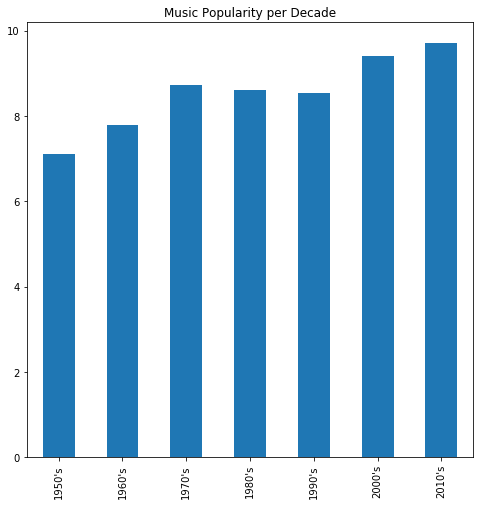

In [26]:
#Show Series on plot
music_series.plot.bar(figsize=(8,8), title="Music Popularity per Decade")

In [27]:
music_series

1950's    7.111111
1960's    7.785714
1970's    8.735294
1980's    8.604651
1990's    8.527778
2000's    9.396552
2010's    9.705882
dtype: float64

## And now - Movies!

After we've calculated the music score of each decade, we're going to do the same for movies.

We'll use a csv file of 81,000 movies from IMDB, and give each one of them a new column with the movie's decade (we used lambda to turn 1995 to 1990's etc.).

Then we calculated the average movie rating of each decade.

![gif3](https://media.tenor.com/images/c6274efe6d38e543cbbce8c64d2ec95a/tenor.gif)

In [28]:
#Open and clean the IMDB DataFrame
movies_df = pd.read_csv("IMDb movies.csv",parse_dates=["year","date_published"]).dropna(how = "any")

In [29]:
#Check DataFrame info
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6456 entries, 488 to 81059
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   imdb_title_id          6456 non-null   object        
 1   title                  6456 non-null   object        
 2   original_title         6456 non-null   object        
 3   year                   6456 non-null   datetime64[ns]
 4   date_published         6456 non-null   datetime64[ns]
 5   genre                  6456 non-null   object        
 6   duration               6456 non-null   int64         
 7   country                6456 non-null   object        
 8   language               6456 non-null   object        
 9   director               6456 non-null   object        
 10  writer                 6456 non-null   object        
 11  production_company     6456 non-null   object        
 12  actors                 6456 non-null   object        
 13  

In [30]:
#Create a column of decades (changing specific year to just decade)
movies_df['decade'] = movies_df.date_published.apply(lambda x: str(x)[:3]+'0')
movies_df['decade'] = movies_df['decade'].astype(int)

In [31]:
#Create a function that gets a decade and returns the average vote score
def get_movies_avg_vote (num):
    decade = movies_df["decade"] == num
    return movies_df[decade]["avg_vote"].mean()

In [32]:
#Create a Series of the average movies popularity per decade
movies_dic = {}
for decade in decades:
    decade_movie_avg = get_movies_avg_vote(decade)
    decade_trans = lambda a: str(a)[:3]+'0\'s'
    movies_dic[decade_trans(decade)] = decade_movie_avg
movies_decade_avg = pd.Series(movies_dic)

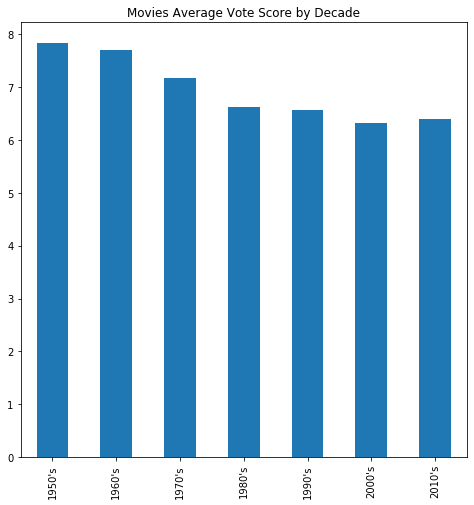

In [33]:
#Show results on a bar plot
movies_decade_avg.plot.bar(figsize=(8,8), title="Movies Average Vote Score by Decade")

In [34]:
movies_decade_avg

1950's    7.828571
1960's    7.691304
1970's    7.175817
1980's    6.613112
1990's    6.559259
2000's    6.324166
2010's    6.388064
dtype: float64

In [35]:
#Transform the music scores to a scale of 0-10
normal_music_series = music_series *100/14/10
normal_music_series

1950's    5.079365
1960's    5.561224
1970's    6.239496
1980's    6.146179
1990's    6.091270
2000's    6.711823
2010's    6.932773
dtype: float64

## **Now let's put both scores together, and calculate the average art score of each decade.**

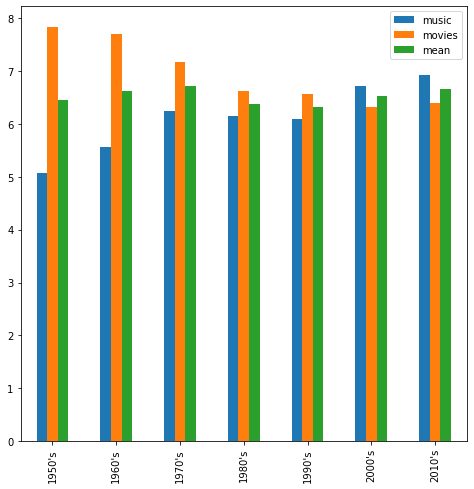

In [36]:
#Create a new DataFrame with the mean score 
music_and_movies = pd.DataFrame({"music":normal_music_series, "movies":movies_decade_avg})
music_and_movies["mean"] = music_and_movies.mean(axis=1)
music_and_movies.plot.bar(figsize=(8,8))

In [37]:
music_and_movies

,music,movies,mean
1950's,5.079365,7.828571,6.453968
1960's,5.561224,7.691304,6.626264
1970's,6.239496,7.175817,6.707656
1980's,6.146179,6.613112,6.379646
1990's,6.091270,6.559259,6.325265
2000's,6.711823,6.324166,6.517994
2010's,6.932773,6.388064,6.660419


## Now for the last part - IT'S WAR TIME

We'll access a wikipedia page with data of all wars in the USA across all decades.

We'll calculate how many wars were in each decade with a pointing system - each decade gets 1 point for each war that took part during this decade.

Finally, we'll show the number of wars in each decade on a graph.

![url4](https://media1.tenor.com/images/8eab81a39eb12b22915847c79e82ec35/tenor.gif?itemid=10936412)

In [38]:
#Use the wikipedia api to get data from the article's tables
#Relevant article: https://en.wikipedia.org/wiki/List_of_wars_involving_the_United_States
tables = import_tables('List_of_wars_involving_the_United_States') #returns a list of WikiTable objects

In [39]:
#Create a list of years with wars from Wikipedia
#At first we did it for the 20th century (1900-1999)
#We used the keywords "Part" and "Location" to split the strings and extract the years
war_years = []
for row in tables[2].rows:
    war = str(row.get("Conflict"))
    war = war.split()
    for i in range(0, len(war)):
        if "Part" in war:
            if war[i] == "Part":
                text_start = war[0:i]
                for word in text_start:
                    if "(" in word:
                        war_years.append(word.strip(")("))
        else:
            if war[i] == "Location:":
                text_start = war[0:i]
                for word in text_start:
                    if "(" in word:
                        war_years.append(word.strip(")("))
                        
#Create a dictionary with decades and occurrences of wars
#Eeach war gives 1 point to each decade it was part of
#(If a war is spread over 2 different decades - it gives 1 point to each decade)
wars_dic = {}
for i in range(0,len(war_years)):
    #Check if its a range of years or a single year by looking for "–"
    if ("–") not in war_years[i]:
        year_trans = lambda a: str(a)[:3]+'0\'s'
        dec = year_trans(war_years[i])
        wars_dic[dec] = wars_dic.get(dec, 0) + 1
    else:
        #Check if both years are in the same decade
        if war_years[i][2] == war_years[i][7]:
            year_trans = lambda a: str(a)[:3]+'0\'s'
            dec = year_trans(war_years[i])
            wars_dic[dec] = wars_dic.get(dec, 0) + 1
        else:
            #If they are not in the same decade - calculate the decades
            lst = []
            start_year = int(war_years[i][0:4])
            end_year = war_years[i][5:]
            if end_year == "present":
                end_year = "2019"
            end_year = int(end_year)
            r = list(range(start_year, end_year))
            for ii in range(0,len(r)):
                r[ii] = str(r[ii])
                year_trans = lambda a: str(a)[:3]+'0\'s'
                dec = year_trans(r[ii])
                if dec not in lst:
                    lst.append(dec)
            for year in lst:
                wars_dic[year] = wars_dic.get(year, 0) + 1
wars_20_cen = pd.Series(wars_dic)

In [40]:
#Use the same process for the next century (2000-present)
war_years = []
for row in tables[3].rows:
    war = str(row.get("Conflict"))
    war = war.split()
    for i in range(0, len(war)):
        if "Part" in war:
            if war[i] == "Part":
                text_start = war[0:i]
                for word in text_start:
                    if "(" in word:
                        war_years.append(word.strip(")("))
        else:
            if war[i] == "Location:":
                text_start = war[0:i]
                for word in text_start:
                    if "(" in word:
                        war_years.append(word.strip(")("))

wars_dic = {}
for i in range(0,len(war_years)):
    #Check if its a range of years or a single year by looking for "–"
    if ("–") not in war_years[i]:
        year_trans = lambda a: str(a)[:3]+'0\'s'
        dec = year_trans(war_years[i])
        wars_dic[dec] = wars_dic.get(dec, 0) + 1
    else:
         #Check if both years are in the same decade
        if war_years[i][2] == war_years[i][7]:
            year_trans = lambda a: str(a)[:3]+'0\'s'
            dec = year_trans(war_years[i])
            wars_dic[dec] = wars_dic.get(dec, 0) + 1
        else:
            #If they are not in the same decade - calculate the decades
            lst = []
            start_year = int(war_years[i][0:4])
            end_year = war_years[i][5:]
            if end_year == "present":
                end_year = "2019"
            end_year = int(end_year)
            r = list(range(start_year, end_year))
            for ii in range(0,len(r)):
                r[ii] = str(r[ii])
                year_trans = lambda a: str(a)[:3]+'0\'s'
                dec = year_trans(r[ii])
                if dec not in lst:
                    lst.append(dec)
            for year in lst:
                wars_dic[year] = wars_dic.get(year, 0) + 1
wars_21_cen = pd.Series(wars_dic)

In [41]:
#Put both serieses together using append
#create a DataFrame and sum duplicates, then reset index
all_wars = wars_20_cen.append(wars_21_cen)
all_wars = pd.DataFrame({"decade": all_wars.index, "num_wars": all_wars.values})
all_wars = all_wars.groupby("decade").sum()
all_wars.reset_index(inplace=True)

In [42]:
#Drop irrelevant rows (decades 1900's - 1940's)
all_wars.drop([0,1,2,3,4], inplace=True)
all_wars.reset_index(inplace=True)

In [43]:
all_wars

,index,decade,num_wars
0,5,1950's,4
1,6,1960's,9
2,7,1970's,4
3,8,1980's,9
4,9,1990's,7
5,10,2000's,7
6,11,2010's,11


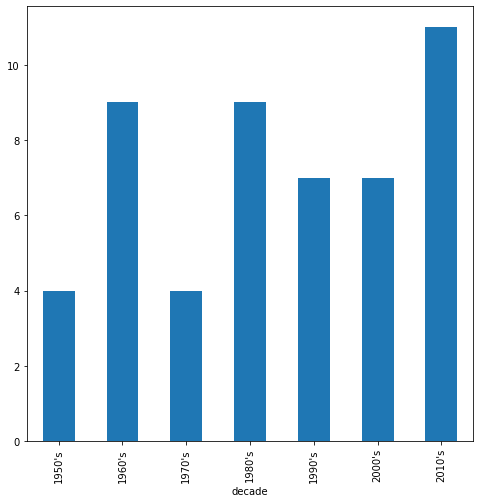

In [44]:
#Show number of wars in all decades on plot
wars_plot = all_wars.set_index("decade")["num_wars"].plot(kind="bar", figsize = (8,8))
wars_plot

In [45]:
#Change the number of wars scale to 0-10
#the max number of wars per decade (11) is the max value (100%)
#all other decades are relative
all_wars["num_wars"] = all_wars["num_wars"] *100/11/10

In [46]:
#Create final DataFrame the contains all the music score, movies scores
#and number of wars in each decade.
total_score = pd.DataFrame({"music_score": normal_music_series.values, 
                            "movie_score": movies_decade_avg.values, "wars": all_wars["num_wars"]})

In [47]:
#Set the index as decades
decade_names = all_wars["decade"].tolist()
total_score["index"] = decade_names
total_score.set_index("index", inplace=True)

In [48]:
total_score

,music_score,movie_score,wars
index,,,
1950's,5.079365,7.828571,3.636364
1960's,5.561224,7.691304,8.181818
1970's,6.239496,7.175817,3.636364
1980's,6.146179,6.613112,8.181818
1990's,6.091270,6.559259,6.363636
2000's,6.711823,6.324166,6.363636
2010's,6.932773,6.388064,10.000000


## Looks like we have everything we need - now let's see what we got!

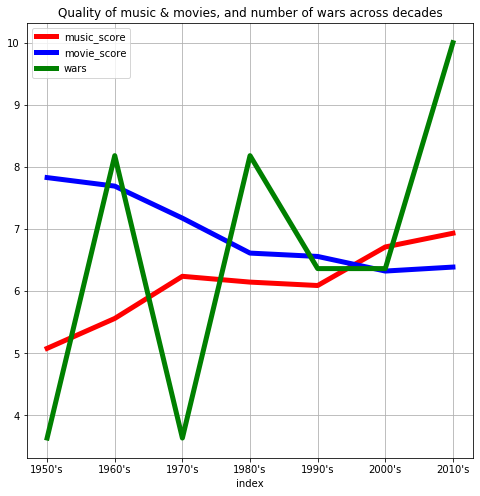

In [49]:
#Show results on plot
total_score.plot.line(figsize=(8,8), color=['r',"b","g"], linestyle='-', 
                      linewidth=5, grid=True, title="Quality of music & movies, and number of wars across decades")

![gif555](https://media1.tenor.com/images/14ede2a1406b68340446e038f42395ff/tenor.gif?itemid=14234819)

## That's it for now, thanks for reading!

![neilndaniel](https://i.imgur.com/JbdxpSt.jpg)